## Programming for Data Analytics: Project 1, Simulating Data

## Table of Contents:

* [1. About the Project](#section1)
* [2. Chosen Real-World Phenomena](#section2)
* [3. Real-World Datasets](#section3)
* [4. Analyzing the Real-World Dataset](#section4)
* [5. Variables](#section5)
* [6. Simulation](#section6)
* [7. References](#section7)

## 1. About the Project <a class="anchor" id="section1"></a>

The instructions for this project are outlined below. Please see *ProgDAProject.pdf* in the main repository for further information. 

For this project I was instructed to create a dataset by simulating a real-world phenomenon of my own choosing. Rather than collecting data, I was instructed to model and synthesize data using Python via the numpy.random package. 

The criteria for choosing a real-world phenomena were as follows:
- It must be a phenomena that can be measured
- It must be possible to collect at least 100 data points
- The data must span at least 4 different variables

Having chosen a phenomena to simulate, I was then to investigate the types of variables involved, their likely distributions, and their relationships with each other. I would then simulate a dataset as closely matching these properties as possible.

Within this notebook I have detailed my research and implementation of the simulated dataset.

Please note that the focus of the project is to create a synthesized dataset.

Code within this notebook is written using Python3. I also made use of various Python packages, such as numpy.random, pandas, and seaborn. 
- numpy.random is part of the NumPy package and is particularly useful for numerical and scientific analysis. In this project it was essential for generating random numbers within the desired parameters of the simulated dataset. 
- Pandas is a Python package that focuses on data analysis.
- Seaborn is a powerful Python package that allows for statistically informative visualizations.
- matplotlib.pyplot is part of the PyPlot package and is useful for drawing plots.

In [3]:
# Importing Python libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Chosen Real-World Phenomena <a class="anchor" id="section2"></a>

I chose to explore the topic of poverty trends and indicators in Ireland, specifically the relationship between various variables and the risk of poverty. 

Poverty as a category within the datasets will be divided into two subcategories: at risk of poverty, and consistent poverty. At risk of poverty is defined by the CSO as the share of persons with an equivalised income below a given percentage (usually 60%) of the national median income. Consistent poverty counts those who are at risk of poverty and are also experiencing enforced deprivation. Deprivation within the datasets refer to households that are considered to be marginalised or deprived because they cannot afford goods and services which are considered to the the norm. 

There are three indicatiors used by government and statistical bodies to measure poverty in Ireland: consistent poverty, at risk of poverty, and material deprivation.

Ireland's population is more at risk of poverty than the EU-15 average and 11.6% of the population are living on an income below the poverty line as of 2021. However those at risk of poverty has fallen slightly from 20.4% in 2019 to 20.00% in 2021. 

I have based my simulated dataset on various *data.cso.ie* datasets that were derived from a *cso.ie* survey titled *Survey on Income and Living Conditions*. The purpose of this survey is to collect information on the income and living conditions of different household types in Ireland in order to derive indicators on poverty, deprivation, and social exclusion. When simulating my own dataset I drew from this source. It is updated annually and at the time of this project covered the time period of 2004-2021. I have chosen to focus on the 2021 data. The 2021 data was published in April 2022 and is the most current data available from the survey at this time.

The 2021 data within the survey had a sample size of 4,846 households (incorporating 12,291 individuals). A household is defined as a private household and the inhabitants of that household, who must have been residing in Ireland at the time the data was collected.

The data is collected from January to June with household interviews being conducted on a weekly basis. The income reference period for the survey is the previous calendar year. The income referenced for the 2021 survey spans the period from January to December 2020. 

The survey is a 5-year rotational sample, with a cross-sectional and a longitudinal element. Households are assigned to one of five *Waves* and will be interviewed on years according to their assigned *Wave*, e.g. *Wave5* households are interviewed in the fifth and final year of the sample.   

The sample is a multi-stage cluster sample resulting in all households in Ireland having an equal probability of selection.
Benchmark information is used to gross up the data to population estimates and is based on age by sex, region, household composition, and tenure status.

The *Survey on Income and Living Conditions 2021* has accompanying *Background Notes* that acknowledge that the impact of the COVID-19 pandemic has impacted the survey as regards operational changes, impact of temporary financial supports, and behavioural changes as a result of lockdowns. 

This survey is voluntary and the resulting data is regulated on a legislative basis by the *Regulation(EU) 2019/1700 of the European Parliament and of the Council of 10 October 2019* as well as the *Commission Regulation(EU) 2019/414 of 14 March 2019* as of 01 January 2021. 

Variables I intended to consider include principal economic status, income, highest level of education completed, household composition, and tenure status. This is not an exhaustive listing of the variables considered by the survey itself.

The indicator categories within the survey include at risk of poverty rate, deprivation rate, consistent poverty, relative at risk of poverty gap, at risk of poverty rate before social transfers, at rick of poverty after rent and mortgage interest, and at risk of poverty rate anchored at a moment in time. 

Further information on variables and indicators can be found in the *Background Notes* portion of *The Survey on Income and Living Conditions 2021* and this will be linked in the references below.

I will be relying on the 2021 data to simulate my dataset, as this is the most up-to-date and complete source at the the of this project. 

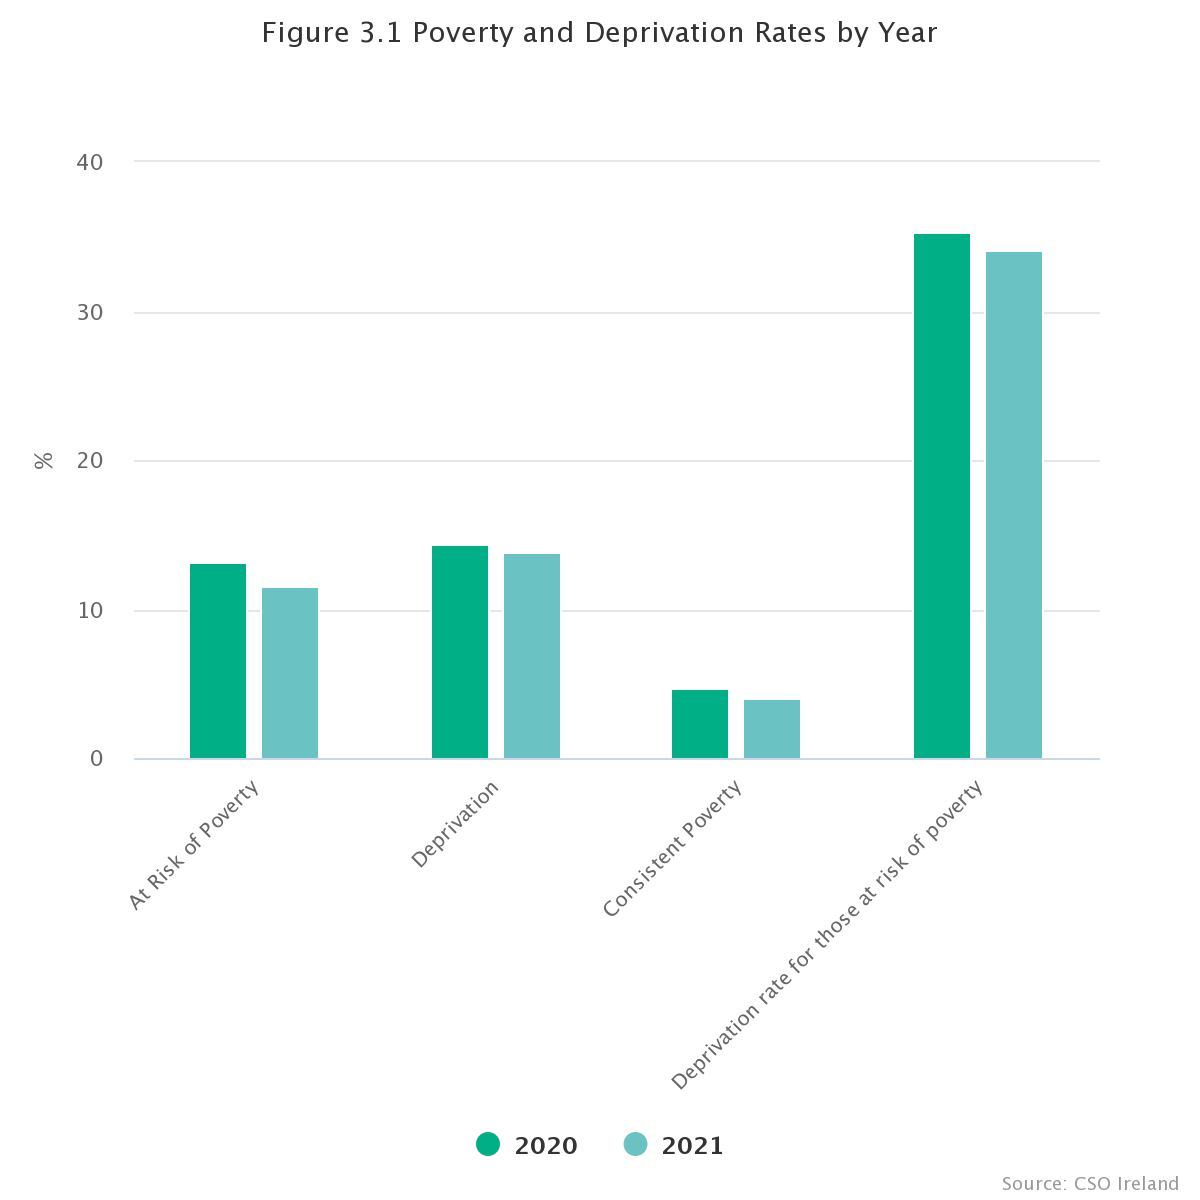

## 3. Real-World Datasets <a class="anchor" id="section3"></a>

In [40]:
# Returning a list of all datasets that provided insight into the topic of risk of poverty

path = "/Users/dredm/Desktop/2. PDA/Project 1/datasets"
os.listdir(path)

['API_IRL_DS2_en_csv_v2_4515217.zip',
 'Income and Poverty Rates.csv',
 'P-SILC2021TBL3.1.xls',
 'P-SILC2021TBL3.6.xlsx',
 'P-SILC2021TBL3.7.xls',
 'poverty_irl.csv',
 'qc_poverty_irl.csv',
 'sdg_01_10.tsv.gz',
 'SIA13.20221204110141.csv',
 'SIA60.20221204T111224.csv',
 'SIA60.20221204T111245.csv',
 'SIA62.20221204T051248.csv',
 'SIA63.20221204T051239.csv',
 'SIA64.20221204T051237.csv',
 'SIA65.20221204T051238.csv',
 'SIA66.20221204T051213.csv',
 'SIA67.20221204T051234.csv',
 'SIA68.20221204T051241.csv',
 'SIA84.20221204T051214.csv',
 'SIA85.20221204T051238.csv',
 'SIA86.20221204T051206.csv',
 'SIA87.20221204T051236.csv',
 'SIA871.20221204T051227.csv',
 'SIA_merged.csv']

In [77]:
# Profile of population at risk of poverty for the years 2020-2022 as raw_df dict

df = pd.read_excel(r'C:\Users\dredm\Desktop\2. PDA\Project 1\datasets\P-SILC2021TBL3.6.xlsx')
df.iloc[:,:]
print(df.to_dict('raw_df'))

[{'Table 3.6  Profile of population at risk of poverty1, experiencing deprivation2 and in consistent poverty by demographic characteristics and year': '% of individuals', 'Unnamed: 1': nan, 'Unnamed: 2': nan, 'Unnamed: 3': nan, 'Unnamed: 4': nan, 'Unnamed: 5': nan, 'Unnamed: 6': nan, 'Unnamed: 7': nan, 'Unnamed: 8': nan, 'Unnamed: 9': nan, 'Unnamed: 10': nan}, {'Table 3.6  Profile of population at risk of poverty1, experiencing deprivation2 and in consistent poverty by demographic characteristics and year': nan, 'Unnamed: 1': nan, 'Unnamed: 2': 2020, 'Unnamed: 3': nan, 'Unnamed: 4': nan, 'Unnamed: 5': nan, 'Unnamed: 6': nan, 'Unnamed: 7': 2021, 'Unnamed: 8': nan, 'Unnamed: 9': nan, 'Unnamed: 10': nan}, {'Table 3.6  Profile of population at risk of poverty1, experiencing deprivation2 and in consistent poverty by demographic characteristics and year': nan, 'Unnamed: 1': nan, 'Unnamed: 2': 'Population', 'Unnamed: 3': 'At risk of \npoverty', 'Unnamed: 4': 'Deprivation\nrate2', 'Unnamed: 5'

C:\Users\dredm\AppData\Local\Temp/ipykernel_11960/17652143.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  print(df.to_dict('raw_df'))


## 4. Analyzing the Real-World Dataset <a class="anchor" id="section4"></a>

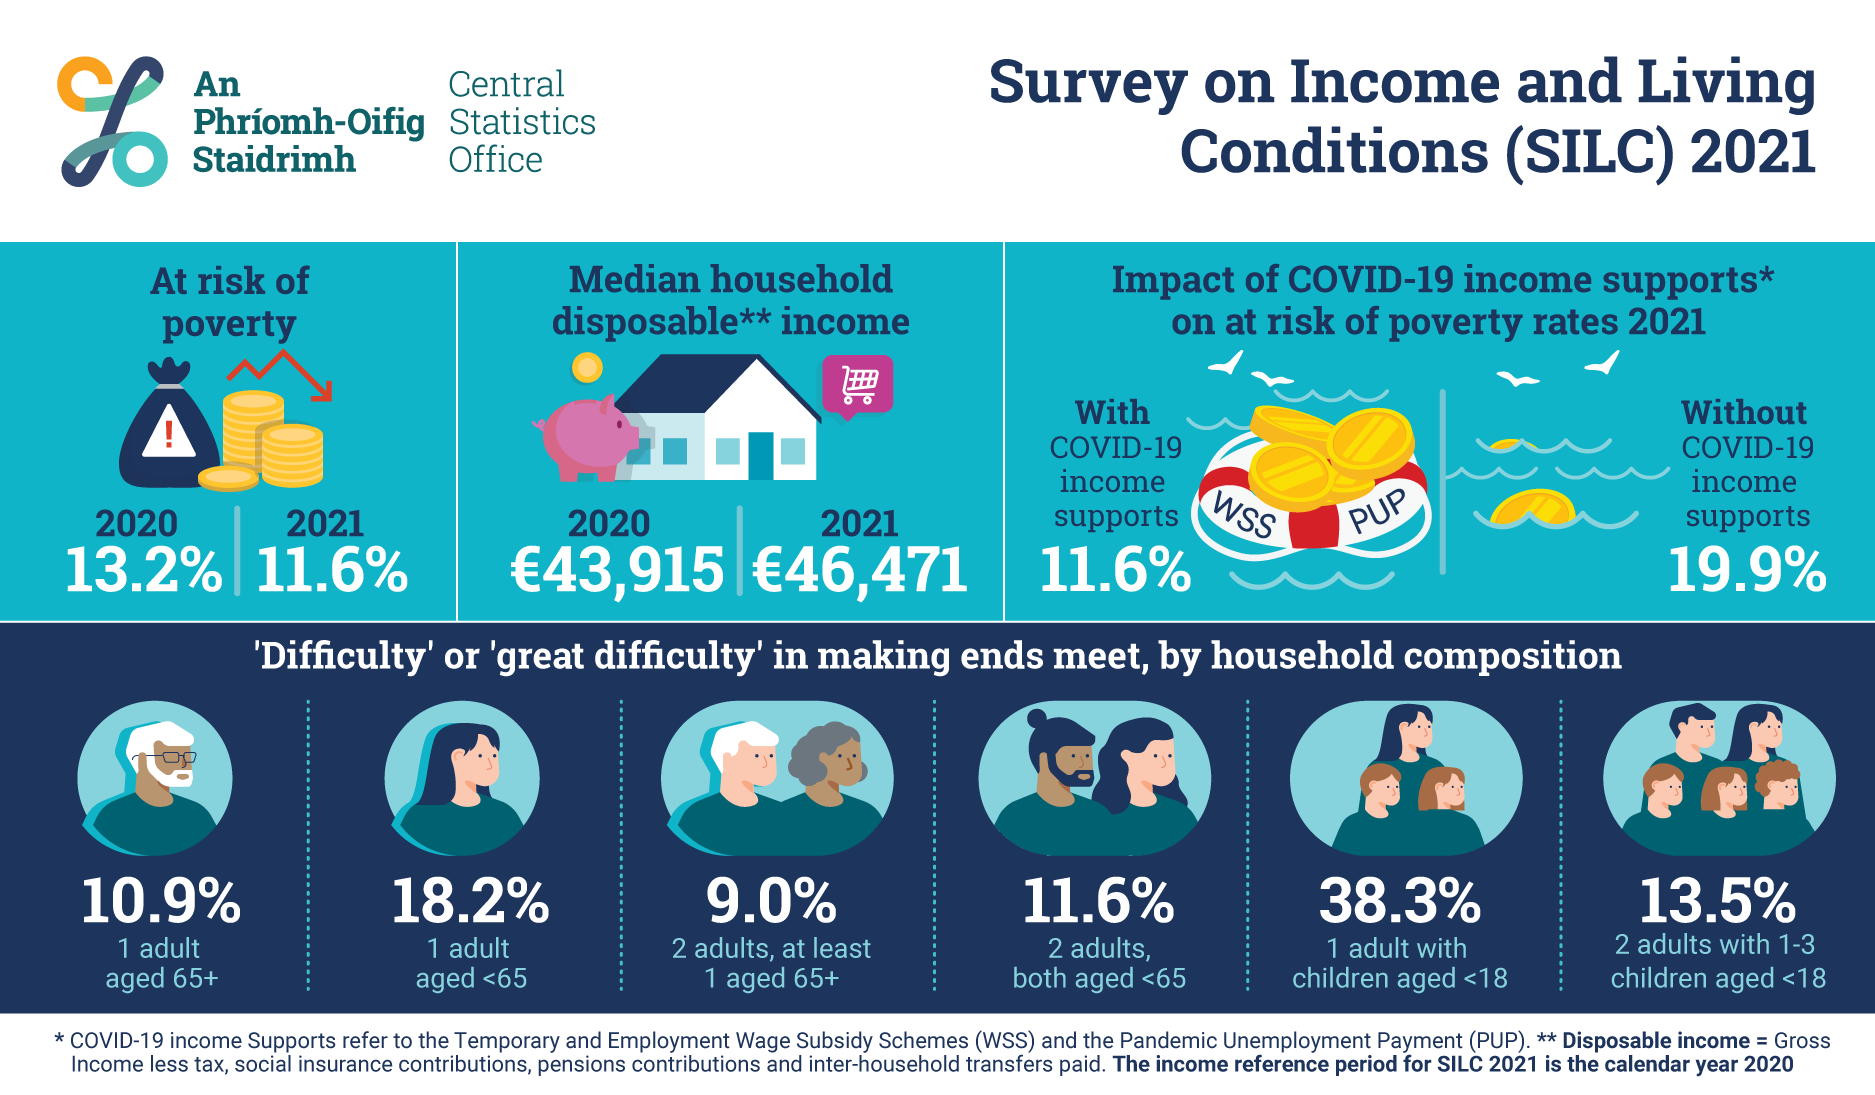

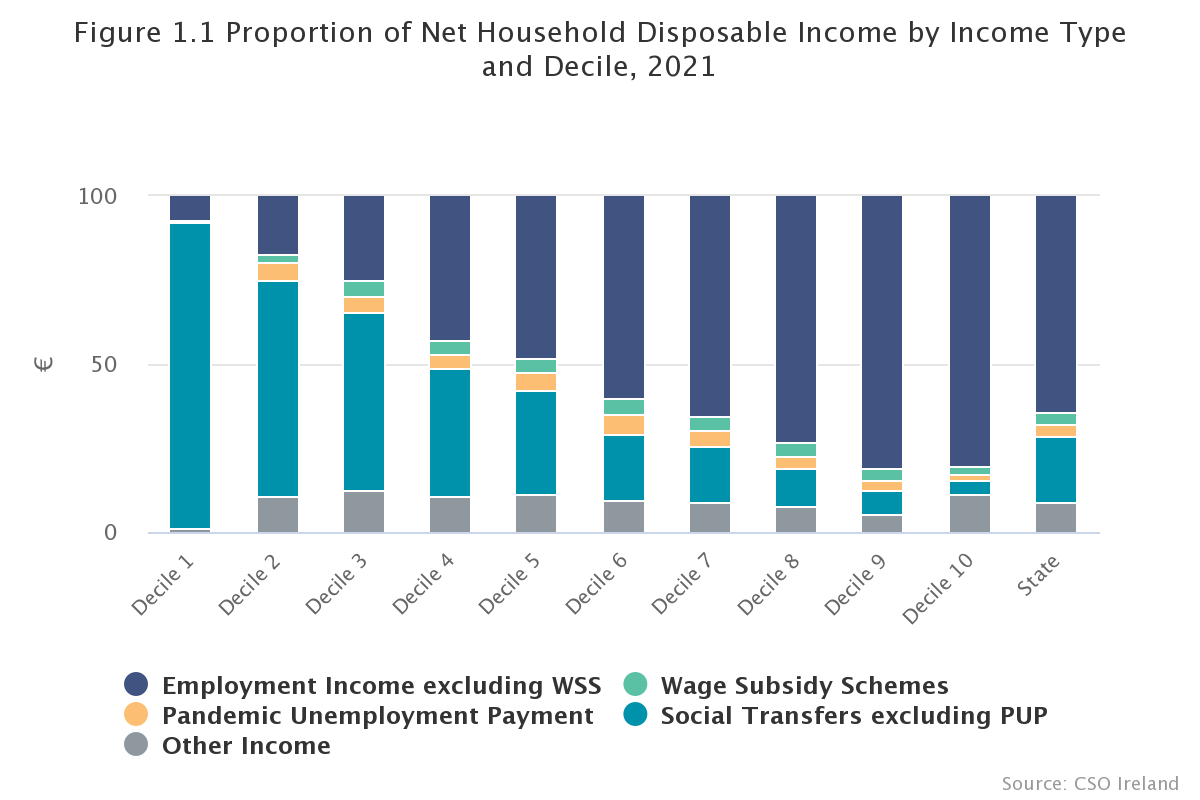

## 5. Variables <a class="anchor" id="section5"></a>

- Income:https://data.cso.ie/table/SIA60

Income has various subcategories within the data. There was an entirely new classification of COVID-19 income supports and these included: Temporary Wage Subsidy Scheme, Employer Wage Subsidy Scheme, and the Pandemic Unemployment Payment. Various social welfare entitlements fall under the subcategory of *Socual Transfers*. Meanwhile *Gross Income* was considered at both a household and individual level. Each individual’s income is summed up to household level and in turn added to household level income components to calculate gross household income. Tax and social insurance contributions are also summed to household level and subtracted from the gross household income to calculate the total disposable household income.

- Principal Economic Status: https://data.cso.ie/table/SIA62 
and https://data.cso.ie/table/SIA83

*Principal Economic Status* has six classifications: Employed, Unemployed, Retired, Unable to work due to long-standing health problems, Student, and Fulfilling domestic tasks. 

- Highest Level of Education: https://data.cso.ie/table/SIA63

The variable *Highest Level of Education Completed* also has six classifications: Primary or below, Lower secondary, Upper secondary, Post leaving certificate, Third level non-degree, and Third level degree or higher.  

- Household Composition: https://data.cso.ie/table/SIA64

*Household Composition* concerns the household as a whole, not just the number of family members within the household. A child is defined as any member of the household aged 17 or under. It has eight classifications: 1 adult aged 65+, 1 adult aged <65, 2 adults at least 1 aged 65+, 2 adults both aged <65, 3 or more adults, 1 adult with children aged under 18, 2 adults with 1 to 3 children aged under 18, and Other households with children aged under 18. 

- Tenure Status: https://data.cso.ie/table/SIA66

The final variable I looked at was *Tenure Status*. This refers to the nature of the accomoation in which the household resides, i.e. is the dwelling owner-occupied of rented/rent-free?

- Poverty Indicators: https://data.cso.ie/table/TAH30 and https://data.cso.ie/table/SIA77

And finally *Poverty* itself is identified by several indicators: at risk of poverty rate, deprivation rate, consistent poverty, relative at risk of poverty gap, at risk of poverty rate before social transfers, at risk of poverty after rent and mortgage interest, and at risk of poverty rate anchored at a moment in time.


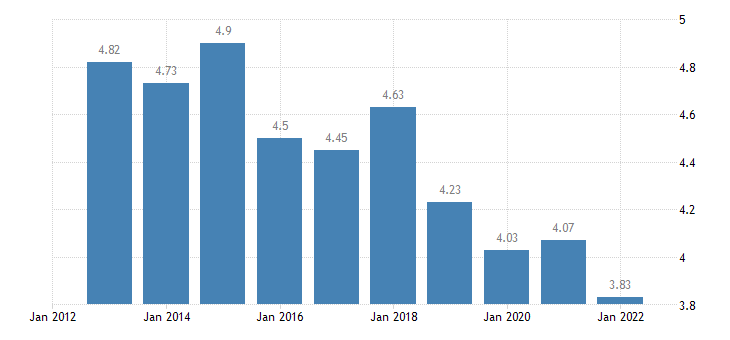

Income distribution had a 3.83 ratio in winter of 2021, according to EUROSTAT. This was a record low. 

## 6. Preparing for Simulation <a class="anchor" id="section6"></a>

Simulate the variables: Income as sim_income, Principal Economic Status as sim_status, Household Composition as sim_compo, Highest Level of Education as sim_edu, Tenure Status as sim_ten

In [192]:
# Simulated Gross Income
# Values: Income range between 0 and 65000, 100 numbers generated

sim_income = []
for i in range(0,110):
    sim_income.append(np.random.randint(0,65000))
print(sim_income)

[24854, 29785, 9521, 28234, 53000, 14032, 12614, 60460, 21608, 50946, 35703, 28076, 49199, 39061, 10175, 57325, 1060, 7918, 46940, 64431, 9489, 52032, 12019, 28560, 11463, 34926, 21882, 47088, 43050, 37484, 11706, 40011, 31957, 34581, 33796, 14539, 1892, 55837, 22747, 28080, 35183, 33121, 63643, 38621, 3620, 40854, 4236, 9901, 55938, 62955, 40281, 10857, 44357, 62021, 37137, 57159, 24795, 64452, 6228, 38830, 49834, 5901, 25587, 8143, 38317, 63769, 55901, 7123, 13490, 49144, 62704, 59289, 15831, 47059, 39895, 5484, 61199, 14899, 27383, 1331, 21416, 549, 29257, 15837, 41496, 16059, 12418, 9338, 58967, 53204, 64909, 19566, 23842, 18404, 3917, 55194, 63997, 52075, 56795, 57995, 40087, 19241, 28614, 21421, 23822, 17545, 19347, 51592, 22874, 40327]


In [193]:
# Principal Economic Status
# Values: employed, unemployed, retired, unable to work due to long-standing health problems, student, fulfilling domestic tasks

status_values = ['employed', 'unemployed', 'retired', 'unable to work due to long-standing health problems', 'student', 'fulfilling domestic tasks']
sim_status = random.choices(status_values, k=110)
print(sim_status)

['unemployed', 'unable to work due to long-standing health problems', 'unable to work due to long-standing health problems', 'fulfilling domestic tasks', 'employed', 'retired', 'unable to work due to long-standing health problems', 'retired', 'retired', 'employed', 'unemployed', 'unemployed', 'unemployed', 'unable to work due to long-standing health problems', 'unemployed', 'unable to work due to long-standing health problems', 'fulfilling domestic tasks', 'employed', 'employed', 'fulfilling domestic tasks', 'unable to work due to long-standing health problems', 'employed', 'employed', 'retired', 'fulfilling domestic tasks', 'retired', 'unable to work due to long-standing health problems', 'employed', 'student', 'employed', 'student', 'unemployed', 'student', 'unable to work due to long-standing health problems', 'employed', 'retired', 'employed', 'unable to work due to long-standing health problems', 'employed', 'fulfilling domestic tasks', 'unable to work due to long-standing health 

In [194]:
# Highest Level of Education
# Values: primary or below, lower secondary, upper secondary, third level non-degree, third level degree or higher, post leaving certificate

edu_values = ['primary of below', 'lower secondary', 'upper secondary', 'third level non-degree', 'third level degree or higher', 'post leaving certificate']
sim_edu = random.choices(edu_values, k=110)
print(sim_edu)

['upper secondary', 'upper secondary', 'third level degree or higher', 'third level degree or higher', 'third level non-degree', 'third level degree or higher', 'upper secondary', 'third level non-degree', 'third level non-degree', 'lower secondary', 'post leaving certificate', 'primary of below', 'third level non-degree', 'third level degree or higher', 'third level degree or higher', 'upper secondary', 'upper secondary', 'upper secondary', 'third level non-degree', 'lower secondary', 'lower secondary', 'third level degree or higher', 'lower secondary', 'lower secondary', 'post leaving certificate', 'third level degree or higher', 'third level non-degree', 'post leaving certificate', 'third level degree or higher', 'post leaving certificate', 'third level non-degree', 'lower secondary', 'primary of below', 'third level degree or higher', 'third level non-degree', 'lower secondary', 'third level degree or higher', 'third level non-degree', 'third level non-degree', 'post leaving certif

In [195]:
# Household Composition
# Values: 1 adult aged 65 years and over, 1 adult aged less than 65 years, 2 adults at least 1 aged 65 years and over, 2 adults both aged less than 65 years, 3 or more adults, 1 adult with children under 18 years, 2 adults with 1 to 3 children under 18 years, other households with children under 18 years

compo_values = ['1 adult aged 65 years and over', '1 adult aged less than 65 years', '2 adults at least 1 aged 65 years and over', '2 adults both aged less than 65 years', '3 or more adults', '1 adult with children under 18 years', '2 adults with 1 to 3 children under 18 years', 'other households with children under 18 years']
sim_compo = random.choices(compo_values, k=110)
print(sim_compo)

['1 adult with children under 18 years', '2 adults both aged less than 65 years', '1 adult aged less than 65 years', 'other households with children under 18 years', '1 adult aged less than 65 years', 'other households with children under 18 years', '3 or more adults', '2 adults at least 1 aged 65 years and over', '2 adults both aged less than 65 years', '2 adults both aged less than 65 years', '2 adults both aged less than 65 years', '1 adult aged 65 years and over', '1 adult aged less than 65 years', '2 adults at least 1 aged 65 years and over', 'other households with children under 18 years', '1 adult aged 65 years and over', '1 adult with children under 18 years', '1 adult with children under 18 years', 'other households with children under 18 years', '3 or more adults', '1 adult with children under 18 years', '1 adult aged 65 years and over', '1 adult aged 65 years and over', '1 adult with children under 18 years', 'other households with children under 18 years', 'other households

In [196]:
# Tenure Status
# Values: owner-occupied, rented or rent free

tenure_values = ['owner-occupied','rented or rent free']
sim_tenure = random.choices(tenure_values, k=110)
print(sim_tenure)

['owner-occupied', 'owner-occupied', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'owner-occupied', 'owner-occupied', 'owner-occupied', 'owner-occupied', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'rented or rent free', 'owner-occupied', 'rented or rent free', 'owner-occupied', 'rented or rent fr

In [197]:
# Merging simulated variables

data_merge = pd.DataFrame(np.column_stack([sim_income, sim_status, sim_edu, sim_compo, sim_tenure]), 
                               columns=['Gross Income', 'Principal Economic Status', 'Highest Level of Education', 'Household Composition', 'Tenure Status'])
print(data_merge)

    Gross Income                          Principal Economic Status  \
0          24854                                         unemployed   
1          29785  unable to work due to long-standing health pro...   
2           9521  unable to work due to long-standing health pro...   
3          28234                          fulfilling domestic tasks   
4          53000                                           employed   
..           ...                                                ...   
105        17545  unable to work due to long-standing health pro...   
106        19347                                            retired   
107        51592                                            retired   
108        22874                                         unemployed   
109        40327                                            student   

       Highest Level of Education  \
0                 upper secondary   
1                 upper secondary   
2    third level degree or higher   

In [200]:
# Create DataFrame with simulated variables

df = pd.DataFrame(data_merge)
df

,Gross Income,Principal Economic Status,Highest Level of Education,Household Composition,Tenure Status
0,24854,unemployed,upper secondary,1 adult with children under 18 years,owner-occupied
1,29785,unable to work due to long-standing health pro...,upper secondary,2 adults both aged less than 65 years,owner-occupied
2,9521,unable to work due to long-standing health pro...,third level degree or higher,1 adult aged less than 65 years,owner-occupied
3,28234,fulfilling domestic tasks,third level degree or higher,other households with children under 18 years,rented or rent free
4,53000,employed,third level non-degree,1 adult aged less than 65 years,rented or rent free
...,...,...,...,...,...
105,17545,unable to work due to long-standing health pro...,primary of below,3 or more adults,rented or rent free
106,19347,retired,post leaving certificate,1 adult with children under 18 years,rented or rent free
107,51592,retired,lower secondary,1 adult with children under 18 years,owner-occupied
108,22874,unemployed,lower secondary,1 adult with children under 18 years,rented or rent free


## 7. References <a class="anchor" id="section"></a>

1. https://ec.europa.eu/eurostat/databrowser/view/sdg_01_10/default/table?lang=en

A Eurostat dataset titled *People at risk of poverty or social exclusion* in European countries. It provides a percentage of the population of each European country and the sum of persons who are at risk of poverty after social transfers, severely materially deprived or living in households with very low work intensity. 

2. https://www.cso.ie/en/releasesandpublications/ep/p-silc/surveyonincomeandlivingconditionssilc2021/summaryofmainresults/

A relatively recent release by *cso.ie* that provides a broad summary of the main findings from the 2021 data.

3. https://web.archive.org/web/20061107202252/http://www.cso.ie/releasespublications/documents/labour_market/current/eusilc.pdf

*EU Survey on Income and Living Conditions* which provides figures for percentages of persons at risk of poverty classified by household composition. 

4. https://www.cso.ie/en/releasesandpublications/ep/p-rsdgi/regionalsdgsireland2017/ph/#indicatorTitle_177809

*Regional SDGs Ireland 2017* explores the relationship between poverty and health, however I focused on the following subsections: at risk of poverty rate, and consistent poverty rate.

5. https://www.cso.ie/en/interactivezone/statisticsexplained/surveyonincomeandlivingconditionsexplained/#:~:text=The%20at%20risk%20of%20poverty%20rate%20is%20the%20share%20of,the%20median%20(middle)%20value.

Explanations of various terms used in "The Survey on Income and Living Conditions" that is compiled by the CSO. 

6. https://www.socialjustice.ie/publication/poverty-focus-2022#:~:text=One%20in%20every%20nine%20people,corresponds%20to%20almost%20595%2C000%20people.


Poverty Focus 2022 article discussing the contribution that increases to welfare payments and supports have made to reductions in the risk of poverty. 

7. https://www.gov.ie/en/publication/551c5d-poverty-indicators/

Indicators of poverty in Ireland. 

8. https://www.cso.ie/en/methods/socialconditions/silc/

Master page for the dataset that I've modelled my simulated dataset on. 

9. https://www.esri.ie/news/irelands-measure-of-basic-deprivation-and-consistent-poverty-fit-for-purpose-of-measuring


10. https://data.gov.ie/dataset/sia13-income-and-poverty-rates

